In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import string as str

In [3]:
filename='X_train'
infile = open(filename,'rb')
X_train=pickle.load(infile)
infile.close()

In [4]:
X_train_2=X_train.tolist()

In [91]:
#Unpickling
infile = open('count_vect_BOW','rb')
count_vect=pickle.load(infile)
infile.close()

infile = open('Train_BOW','rb')
X_train_Bow=pickle.load(infile)
infile.close()

infile = open('tf_idf_vect_TF-IDF','rb')
tf_idf_vect = pickle.load(infile)
infile.close()

infile = open('Train_TF-IDF','rb')
X_train_tfidf=pickle.load(infile)
infile.close()

infile = open('Train_AvgW2V','rb')
X_train_AvgW2V=pickle.load(infile)
infile.close()


infile = open('tfidfW2V_sent_vectors_Train','rb')
X_train_TFIDF_W2V=pickle.load(infile)
infile.close()

In [92]:
X_train_sammp = X_train[:4000]

filename='X_train_4000'
outfile=open(filename,'wb')
pickle.dump(X_train_sammp, outfile)
outfile.close()

In [47]:
def wordcloud(string):   
    words = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    max_words=2000, 
                    min_font_size = 10)
    wc=words.generate(string)    
    return wc
        

In [74]:
def Print_clusters(model):
    fig = plt.figure(figsize = (model.n_clusters*5, model.n_clusters*5))
    for i in range(0,model.n_clusters,1):
        count = 0
        str1=""
        #print("Cluster:%d" %i)
        for j in np.where(model.labels_ == i)[0]:
            str1+=X_train_2[j]
            str1+=" "
        word=wordcloud(str1)
        fig.add_subplot(model.n_clusters,model.n_clusters,i+1)
        plt.imshow(word) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Cluster:%d" %i)
    plt.show() 
    print ("\n")

In [94]:
def text_clusters(model):   
    for i in range(0,model.n_clusters,1):
        count = 0
        print("Cluster:%d" %i)
        for j in np.where(model.labels_ == i)[0]:
            if count <=10:
                print X_train_2[j]
                print(("\n"))
                count+=1
    print ("\n")

# BOW

In [95]:
#BOW
count_vect = CountVectorizer() #in scikit-learn
X_train_BOW = count_vect.fit_transform(X_train_sammp)

import pickle
filename='count_vect_BOW_4000'
outfile=open(filename,'wb')
pickle.dump(count_vect, outfile)
outfile.close()

filename='Train_BOW_4000'
outfile=open(filename,'wb')
pickle.dump(X_train_BOW, outfile)
outfile.close()

In [44]:
model=AgglomerativeClustering(n_clusters=2).fit(X_train_BOW.toarray())

In [45]:
model_5=AgglomerativeClustering(n_clusters=5).fit(X_train_BOW.toarray())

In [46]:
model_10=AgglomerativeClustering(n_clusters=10).fit(X_train_BOW.toarray())

In [50]:
import pickle
filename='model2_bow_AGG'
outfile=open(filename,'wb')
pickle.dump(model, outfile)
outfile.close()

filename='model5_bow_AGG'
outfile=open(filename,'wb')
pickle.dump(model_5, outfile)
outfile.close()

filename='model10_bow_AGG'
outfile=open(filename,'wb')
pickle.dump(model_10, outfile)
outfile.close()

In [7]:
filename='model2_bow_AGG'
infile = open(filename,'rb')
model=pickle.load(infile)
infile.close()

filename='model5_bow_AGG'
infile = open(filename,'rb')
model_5=pickle.load(infile)
infile.close()

filename='model10_bow_AGG'
infile = open(filename,'rb')
model_10=pickle.load(infile)
infile.close()

In [8]:
unique, counts = np.unique(model.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model_5.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model_10.labels_, return_counts=True)
print dict(zip(unique, counts))

{0: 104, 1: 3896}
{0: 26, 1: 3870, 2: 14, 3: 4, 4: 86}
{0: 25, 1: 989, 2: 2610, 3: 10, 4: 86, 5: 1, 6: 2, 7: 2, 8: 4, 9: 271}


Using 2-Clusters

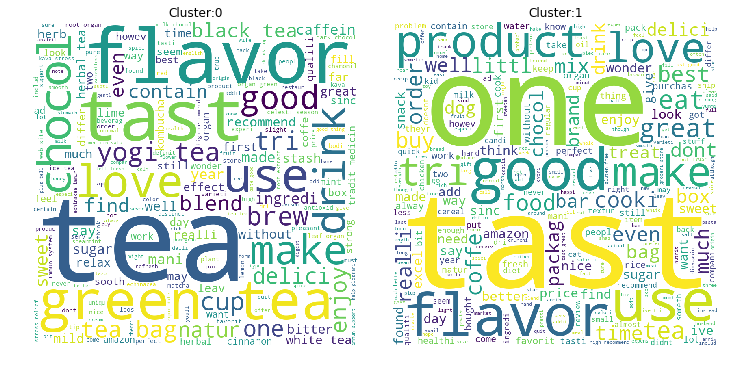

In [75]:
Print_clusters(model)

Here the cluster0 may be having reviews related to tea, chocolates describing their flavours,taste <br>
cluster1 might have reviews related to products,coffee describing their taste,expreince.

Using 5-Clusters

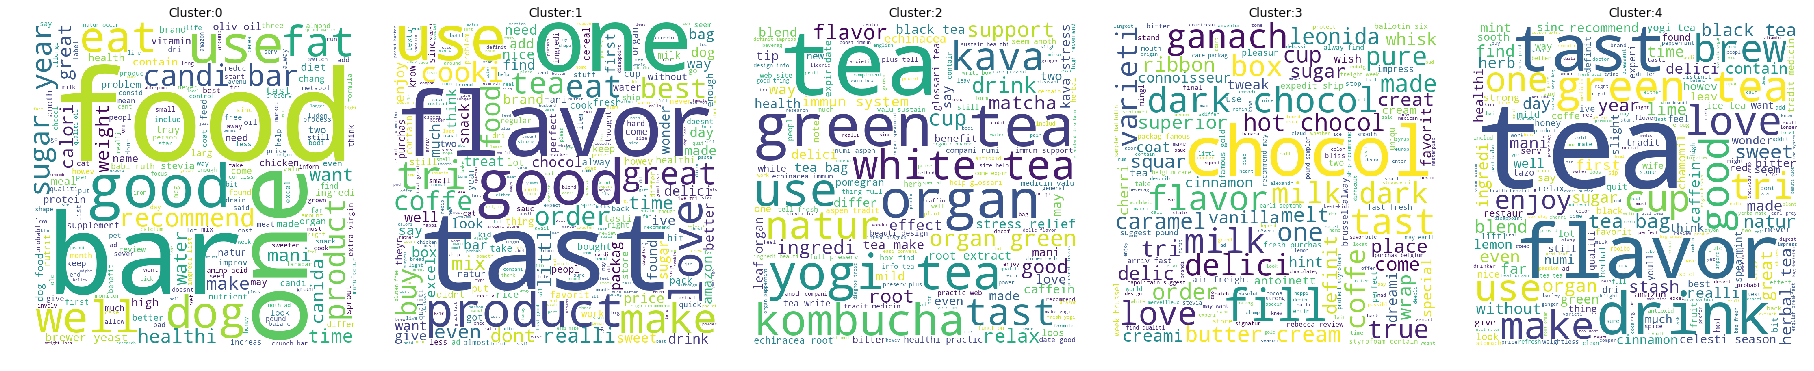

In [76]:
Print_clusters(model_5)

Here 
Cluster0 represents reviews related to food products,candies describing their taste and how products are.<br>
Cluster1 represents reviews related to cookies describing their taste.<br>
Cluster2 represents reviews related different kinds of tea and their expreinces,tastes.<br>
Cluster3 represents reviews related different kinds of chocolates and their flavours,expreinces,tastes.<br>
Cluster4 represents reviews related to tea and users expreinces<br>

Using 10-clusters

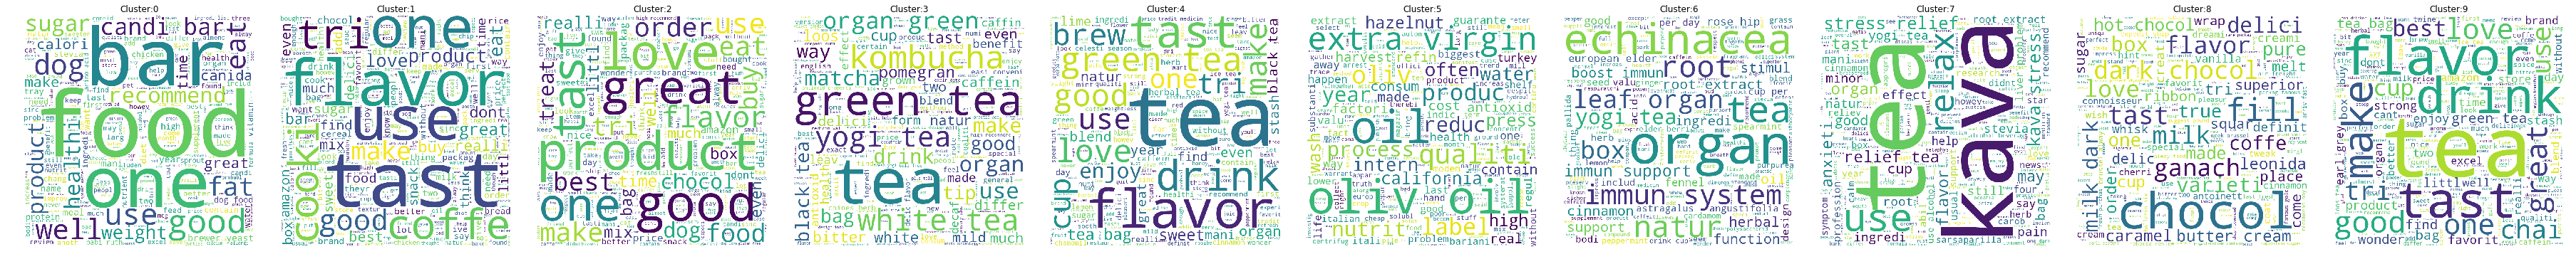

In [77]:
Print_clusters(model_10)

Here each cluster is representing reviews realted to food,cookies,products,oil products, tea flavours,chocolates,tea types.

# TFIDF

In [30]:
#TF-IDF
tf_idf_vect = TfidfVectorizer()
X_train_tf_idf = tf_idf_vect.fit_transform(X_train_sammp)

filename='tf_idf_vect_TF-IDF_4000'
outfile=open(filename,'wb')
pickle.dump(tf_idf_vect, outfile)
outfile.close()

filename='Train_TF-IDF_4000'
outfile=open(filename,'wb')
pickle.dump(X_train_tf_idf, outfile)
outfile.close()


/usr/lib/python2.7/dist-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [32]:
model_tfidf=AgglomerativeClustering(n_clusters=2).fit(X_train_tf_idf.toarray())
model5_tfidf=AgglomerativeClustering(n_clusters=5).fit(X_train_tf_idf.toarray())
model10_tfidf=AgglomerativeClustering(n_clusters=10).fit(X_train_tf_idf.toarray())

In [33]:
filename='model2_tfidf_AGG'
outfile=open(filename,'wb')
pickle.dump(model_tfidf, outfile)
outfile.close()

filename='model5_tfidf_AGG'
outfile=open(filename,'wb')
pickle.dump(model5_tfidf, outfile)
outfile.close()

filename='model10_tfidf_AGG'
outfile=open(filename,'wb')
pickle.dump(model10_tfidf, outfile)
outfile.close()

In [85]:
filename='model2_tfidf_AGG'
infile = open(filename,'rb')
model_tfidf=pickle.load(infile)
infile.close()

filename='model5_tfidf_AGG'
infile = open(filename,'rb')
model5_tfidf=pickle.load(infile)
infile.close()

filename='model10_tfidf_AGG'
infile = open(filename,'rb')
model10_tfidf=pickle.load(infile)
infile.close()

In [86]:
unique, counts = np.unique(model_tfidf.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model5_tfidf.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model10_tfidf.labels_, return_counts=True)
print dict(zip(unique, counts))

{0: 3669, 1: 331}
{0: 252, 1: 3052, 2: 136, 3: 331, 4: 229}
{0: 2766, 1: 229, 2: 136, 3: 79, 4: 70, 5: 79, 6: 47, 7: 90, 8: 331, 9: 173}


Using 2-Clusters

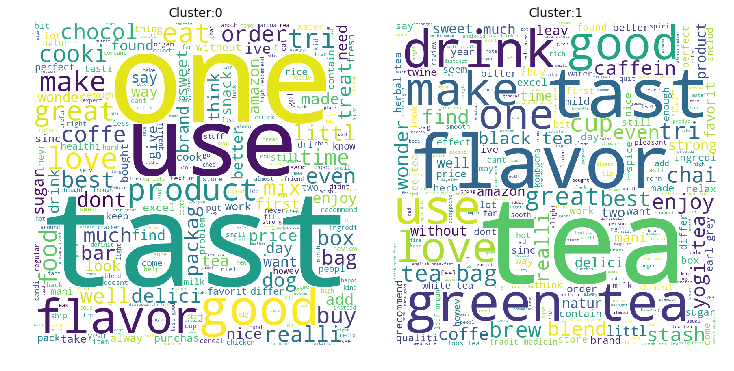

In [87]:
Print_clusters(model_tfidf)

Here the cluster0 may be having reviews related to coffe,cookies, chocolates describing their flavours,taste.<br>
cluster1 might have reviews related to different tea varities and users describing their taste,expreince.

Using 5-clusters

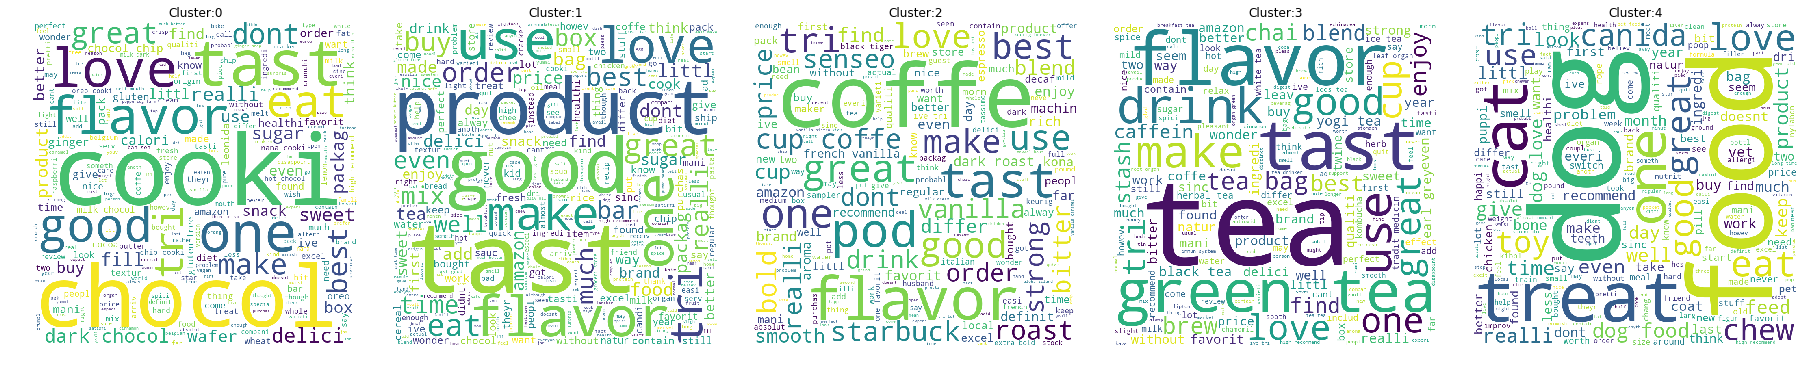

In [88]:
Print_clusters(model5_tfidf)

Here 
Cluster0 represents reviews related to cookies,choclates describing their taste and how products are.<br>
Cluster1 represents reviews related toproducts may be related to grocessories.<br>
Cluster2 represents reviews related to coffee and their expreinces,tastes.<br>
Cluster3 represents reviews related different kinds of tea and their expreinces,tastes.<br>
Cluster4 represents reviews related to animal food products<br>

Using 10-Clusters

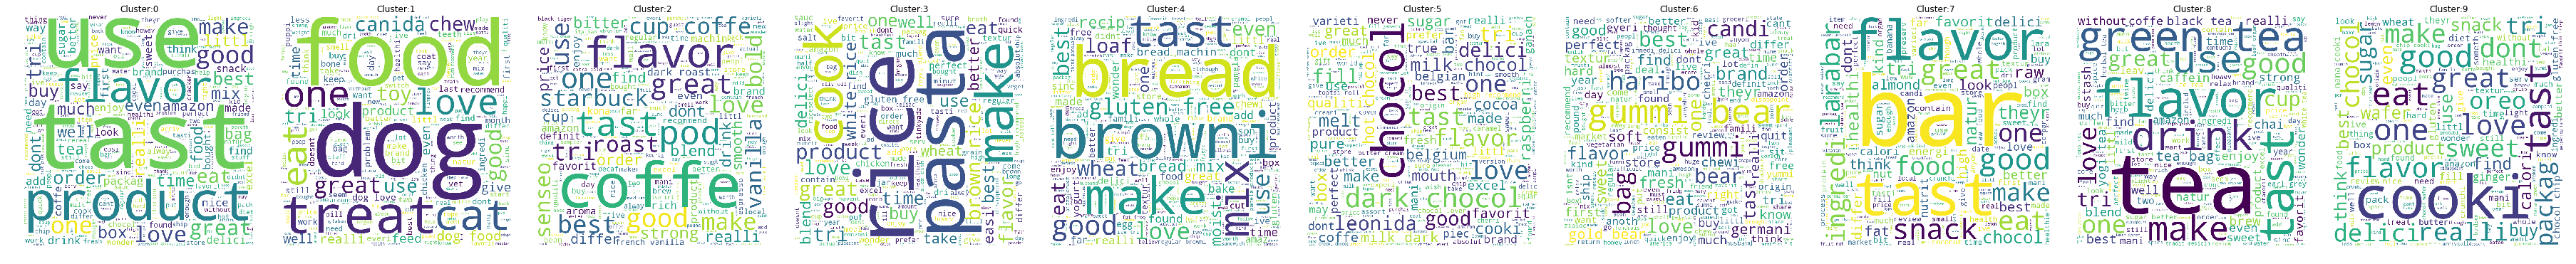

In [89]:
Print_clusters(model10_tfidf)

Here each cluster is showing the reviews related to products(may be grocessories),animal food products,coffee,food items,reviews related to bread and taste,choclates,snacks products,tea, cokies.

# AVGW2V

In [104]:
model_AvgW2V=AgglomerativeClustering(n_clusters=2).fit(X_train_AvgW2V[:4000])
model5_AvgW2V=AgglomerativeClustering(n_clusters=5).fit(X_train_AvgW2V[:4000])
model10_AvgW2V=AgglomerativeClustering(n_clusters=10).fit(X_train_AvgW2V[:4000])

In [105]:
unique, counts = np.unique(model_AvgW2V.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model5_AvgW2V.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model10_AvgW2V.labels_, return_counts=True)
print dict(zip(unique, counts))

{0: 3440, 1: 560}
{0: 1376, 1: 560, 2: 738, 3: 335, 4: 991}
{0: 1003, 1: 509, 2: 427, 3: 335, 4: 372, 5: 373, 6: 188, 7: 222, 8: 311, 9: 260}


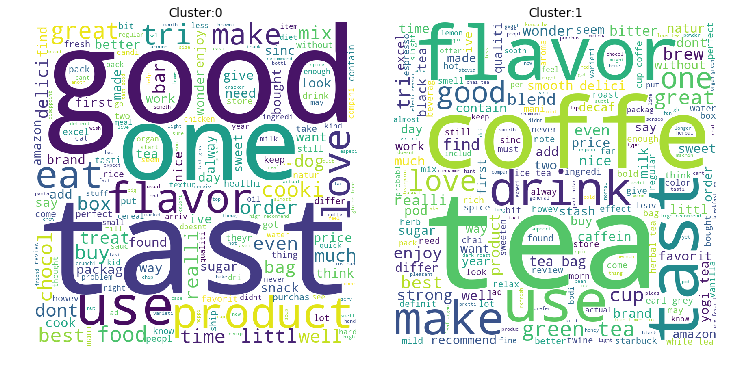

In [106]:
Print_clusters(model_AvgW2V)

Here the cluster0 may be having reviews related to prodcuts(may be grocessories or others) and their expreinces.<br>
cluster1 might have reviews related to tea,coffee and users describing their taste,expreince

Using 5-Clusters

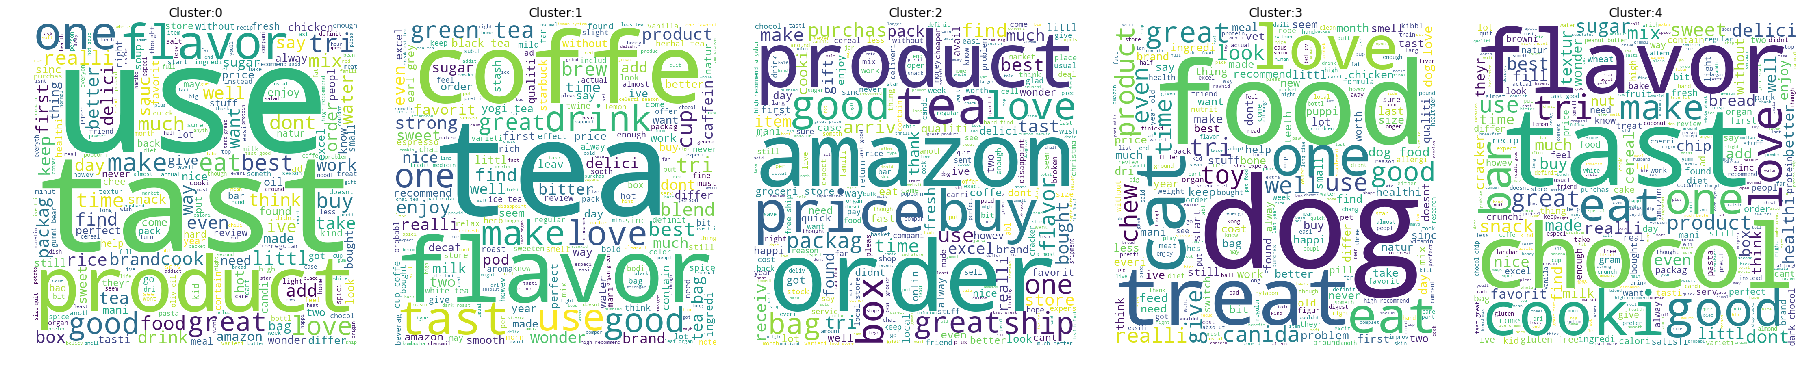

In [107]:
Print_clusters(model5_AvgW2V)

Here Cluster0 represents reviews related to  products may be related to grocessories.<br>
Cluster1 represents reviews related to coffee,tea and users expreinces.<br>
Cluster2 represents reviews related to users expreinces when they purchased in an e-commerce  sites<br>
Cluster3 represents reviews related to animal food products.<br>
Cluster4 represents reviews related to choclates,cookies<br>

Using 10-Clusters

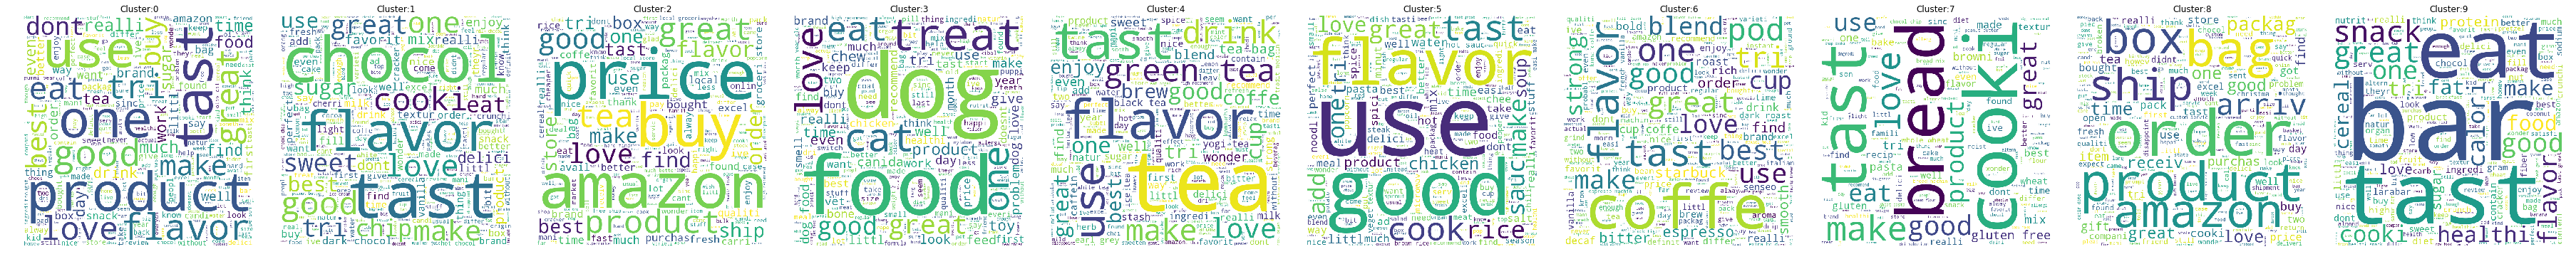

In [108]:
Print_clusters(model10_AvgW2V)

Here reviews in each cluster are related to products(may be grocesories),choclates,exprenince of online purchases,animal food products,tea and expreinces,food products,coffee,bread products,cookies and snacks.

# TFIDF-W2V

In [109]:
model_TFIDF_W2V=AgglomerativeClustering(n_clusters=2).fit(X_train_TFIDF_W2V[:4000])
model5_TFIDF_W2V=AgglomerativeClustering(n_clusters=5).fit(X_train_TFIDF_W2V[:4000])
model10_TFIDF_W2V=AgglomerativeClustering(n_clusters=10).fit(X_train_TFIDF_W2V[:4000])

In [110]:
unique, counts = np.unique(model_TFIDF_W2V.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model5_TFIDF_W2V.labels_, return_counts=True)
print dict(zip(unique, counts))

unique, counts = np.unique(model10_TFIDF_W2V.labels_, return_counts=True)
print dict(zip(unique, counts))

{0: 3341, 1: 659}
{0: 1853, 1: 1163, 2: 530, 3: 325, 4: 129}
{0: 1186, 1: 864, 2: 416, 3: 299, 4: 129, 5: 374, 6: 99, 7: 325, 8: 194, 9: 114}


Using 2-clusters

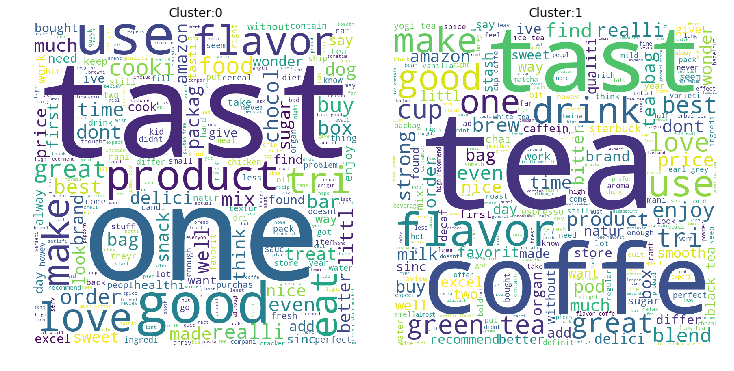

In [112]:
Print_clusters(model_TFIDF_W2V)

Here the cluster0 may be having reviews related to prodcuts(may be grocessories or others) and their expreinces.
cluster1 might have reviews related to tea,coffee and users describing their taste,expreince

Using 5-clusters

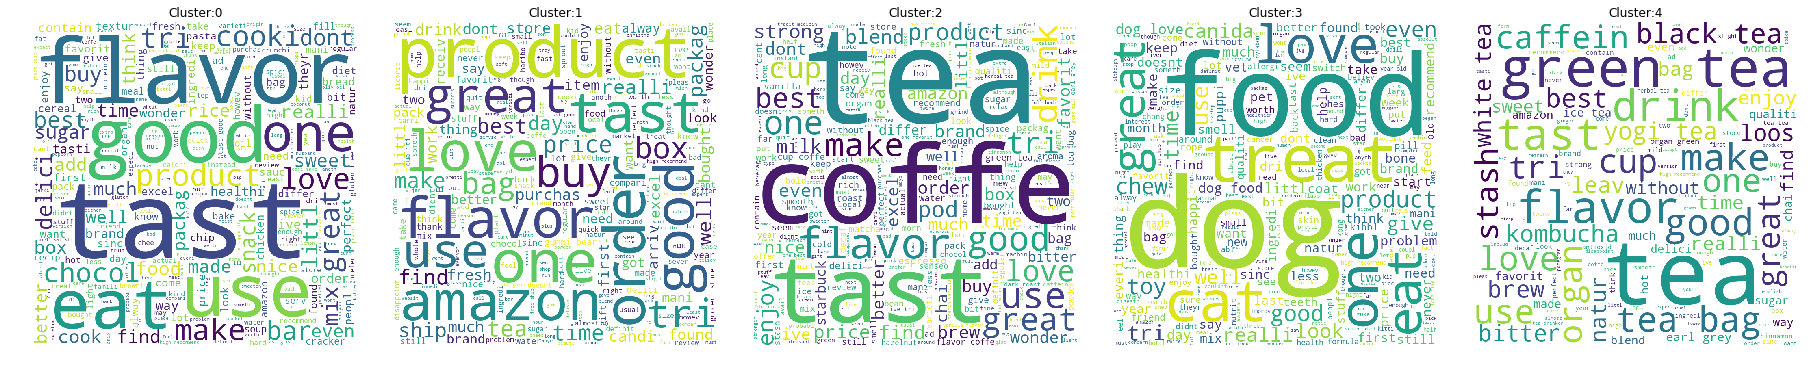

In [115]:
Print_clusters(model5_TFIDF_W2V)

Here Cluster0 represents reviews related to products may be related to grocessories.<br>
Cluster1 represents reviews related to coffee,tea and users expreinces.<br>
Cluster2 represents reviews related to users expreinces when they purchased in an e-commerce sites<br>
Cluster3 represents reviews related to animal food products.<br>
Cluster4 represents reviews related to differnt tea products<br>

Using 10-clusters

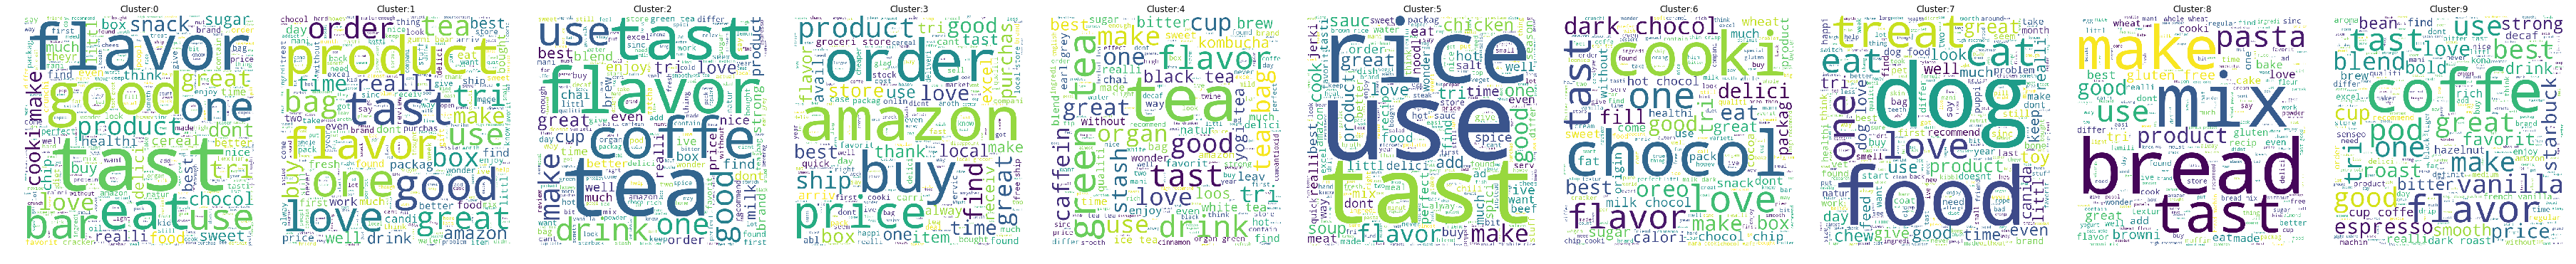

In [114]:
Print_clusters(model10_TFIDF_W2V)

Here reviews in each cluster are related to products(may be grocesories),choclates,tea products,exprenince of online purchases,food products,cookies,choclates,animal food products,bread products.

# Conclusion

The Cluster reviews were much clearly seperated when it is performed with tfidf model when compared to other models where there are some reptetions(may be less of number of points taken.)